In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import LSTM, Dense, Activation, TimeDistributed, Dropout, Lambda, RepeatVector, Input, Reshape
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import tensorflow
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import math

In [9]:
def load(name):
    return load_model(os.path.join(os.getcwd(),"models",name))

In [60]:
def normalize_data(data, scaler,fit=False):
    if fit:
        minmaxscaler = scaler.fit(data)
    else:
        minmaxscaler = scaler
    normalize_data = minmaxscaler.transform(data)

    return normalize_data
def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data
def final_predict(actual,predict,feature,days,stock,date):
    plt.title(f'{stock} prediction after {date}')
    plt.plot(list(actual),label='actual',color='red')
    #plt.plot(list(actual)+list(actual),label='predict')

    plt.plot(list(actual)+list(predict[-1,:,feature]),label='predict',color="blue")
    #print(list(actual)+list(predict[-1,:,feature]))
    #print(list(actual))
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend(loc='best')
    plt.show()
def buildTest(test,pastDay=30,feature = "close"):
    X_test=[]
    for i in range(test.shape[0]-pastDay):
        X_test.append(np.array(test[i:i+pastDay]))
    return np.array(X_test)

In [45]:
a=df['close'][-50:]

print(len(list(a)+list(a)))
print()
len(list(a))

100



50

In [16]:
model_name = "60_to_7_31f_1030_2330"
model = load(model_name)

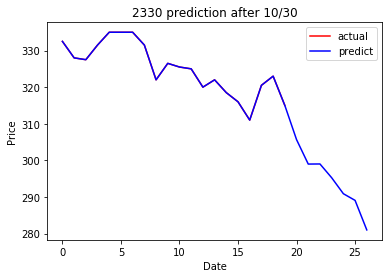

,adj_close,close,high,low,open,volume,year,month,day,week,...,DEM,OSC,Dif,cal_U,cal_D,ema_U,ema_D,RS,RSI,OBV
4047,433.0,433.0,440.5,432.0,440.0,45504160,2020,8,18,1,...,21.349976,-2.821232,-2.0,0.0,2.0,3.919585,2.511236,1.560819,60.949995,0.117647
4048,427.5,427.5,436.5,427.5,436.0,31486800,2020,8,19,2,...,20.533620,-3.265423,-5.5,0.0,5.5,3.396974,2.909738,1.167450,53.862837,0.000000
4049,414.5,415.0,427.5,401.0,427.0,75155235,2020,8,20,3,...,19.444227,-4.357576,-12.5,0.0,12.5,2.944044,4.188440,0.702898,41.276563,0.528302
4050,424.0,424.5,427.0,420.0,421.5,41956467,2020,8,21,4,...,18.348055,-4.384686,9.5,9.5,0.0,3.818172,3.629981,1.051843,51.263337,0.642857
4051,428.0,428.0,434.5,425.0,427.5,49199406,2020,8,24,0,...,17.319120,-4.115740,3.5,3.5,0.0,3.775749,3.145984,1.200181,54.549188,0.315789
4052,434.0,434.5,436.0,430.5,433.5,37024899,2020,8,25,1,...,16.450496,-3.474496,6.5,6.5,0.0,4.138982,2.726519,1.518046,60.286672,0.727273
4053,441.5,442.0,442.0,435.0,435.5,41406340,2020,8,26,2,...,15.810051,-2.561782,7.5,7.5,0.0,4.587118,2.362983,1.941240,66.000737,1.000000
4054,444.0,444.0,453.5,444.0,448.0,57206712,2020,8,27,3,...,15.342071,-1.871919,2.0,2.0,0.0,4.242169,2.047919,2.071454,67.442127,0.000000
4055,435.0,435.0,440.5,431.0,440.0,57039210,2020,8,28,4,...,14.828164,-2.055627,-9.0,0.0,9.0,3.676546,2.974863,1.235871,55.274697,0.421053
4056,426.5,426.5,439.5,426.5,437.0,88569538,2020,8,31,0,...,14.143002,-2.740648,-8.5,0.0,8.5,3.186340,3.711548,0.858494,46.192982,0.000000


In [69]:
stock = "2330"
time_step = 60
with open(os.path.join(os.getcwd(),"data",f"{stock}.pickle"),'rb') as f:
    df = pickle.load(f)
#print(df.iloc[-1])
df.drop(['year','week','month','day','adj_close'],axis=1,inplace=True)
scaler = pickle.load( open( os.path.join(os.getcwd(),"models",model_name,"scaler.pickle"), "rb" ) )

data = normalize_data(df.copy(), scaler)
x_test=buildTest(data, time_step)[-180:-160]
test_predict = model.predict(x_test.copy())
result = inverse_normalize_data(test_predict.copy(), scaler)
final_predict(df['close'][-180:-160],result,feature=list(df.columns).index('close'),days=30,stock=stock,date="10/30")
with open(os.path.join(os.getcwd(),"data",f"{stock}.pickle"),'rb') as f:
    df = pickle.load(f)
df.iloc[-50:-10]
